In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/Loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
df.shape

(255347, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [6]:
print(df.isna().sum())

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [7]:
df = df.drop('LoanID' , axis = 1)

In [8]:
df['Default'].value_counts()

,count
Default,
0,225694
1,29653


Text(0, 0.5, 'Count')

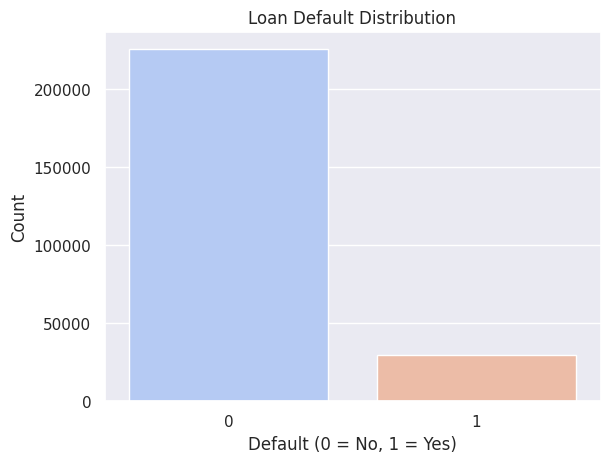

In [9]:
sns.countplot(x='Default', data=df, palette="coolwarm")
plt.title("Loan Default Distribution")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")

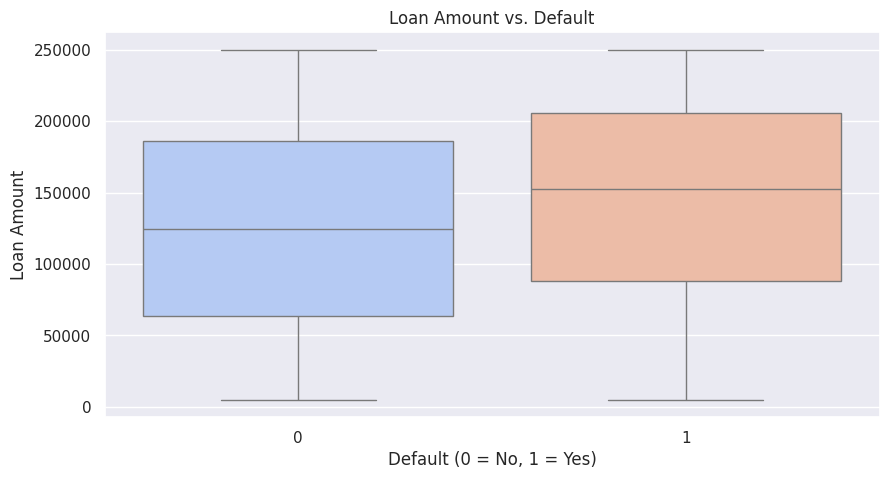

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Default', y='LoanAmount', data=df, palette="coolwarm")
plt.title("Loan Amount vs. Default")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Loan Amount")
plt.show()

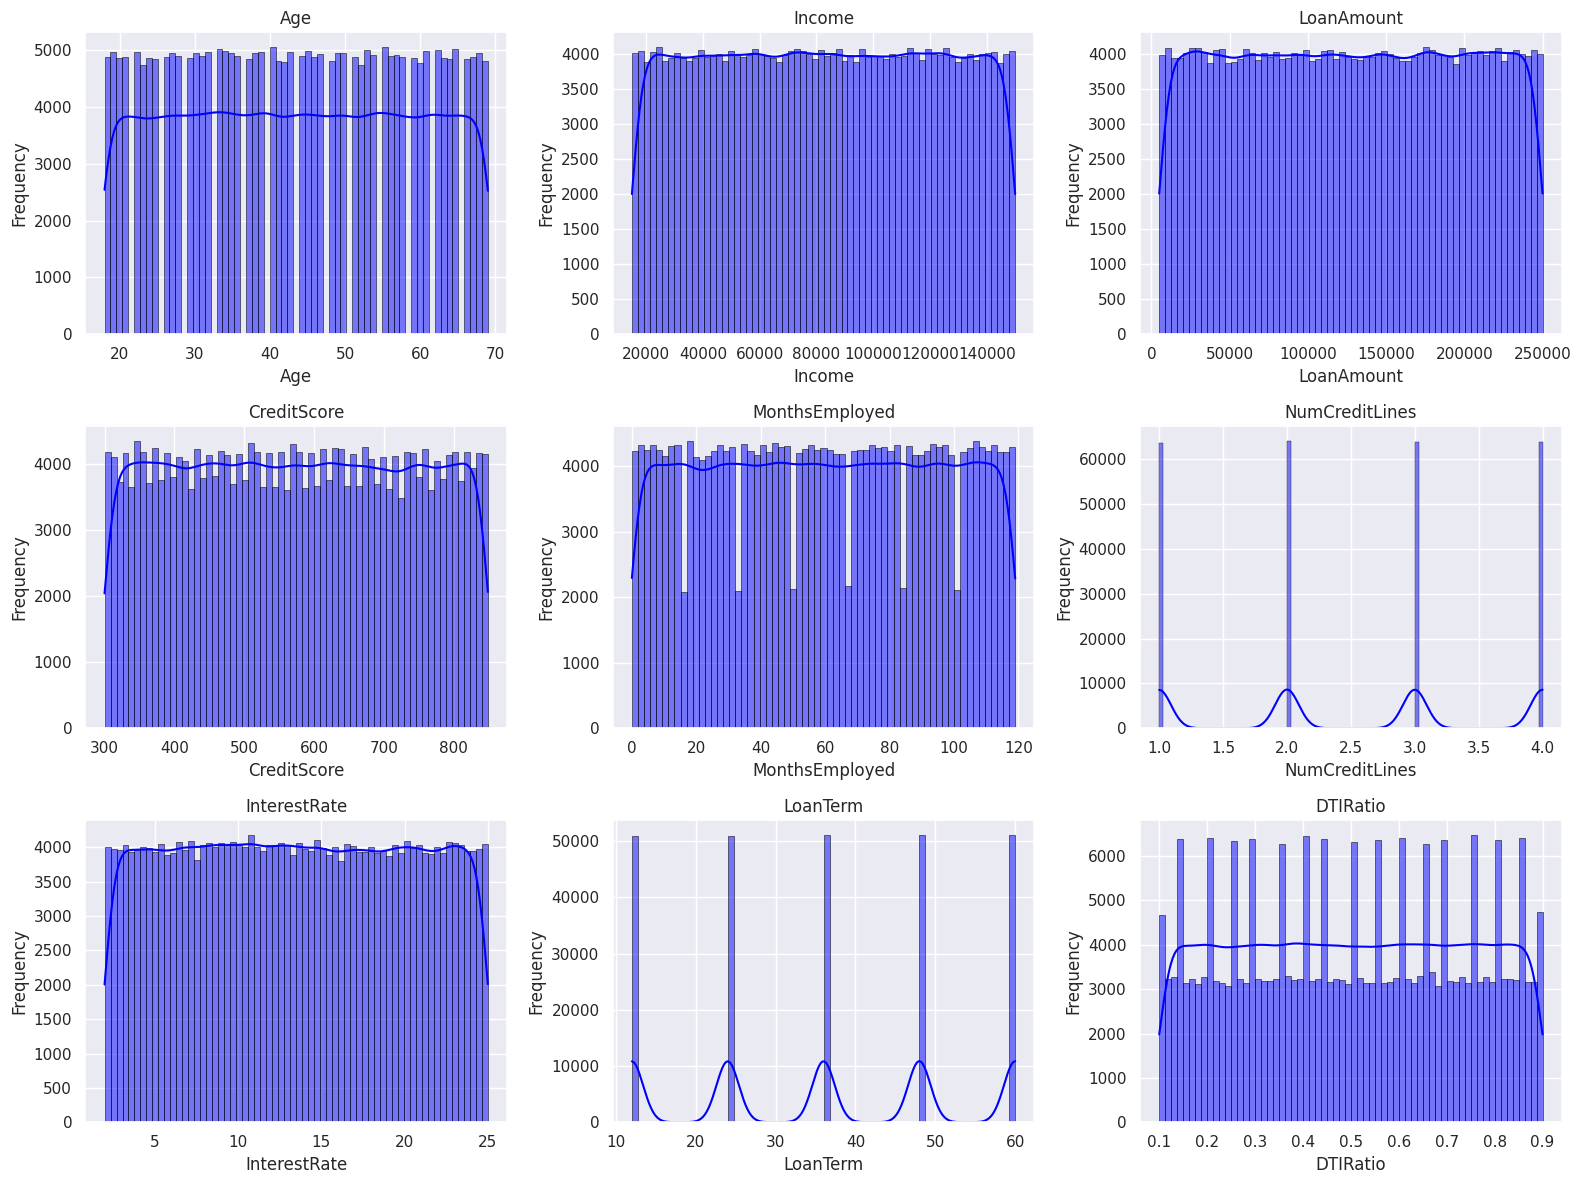

In [11]:
numeric_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns , 1):
    plt.subplot(3 , 3, i)
    sns.histplot(df[col], kde=True , color = "blue" , edgecolor = "black")
    plt.title(f"{col}")

    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()

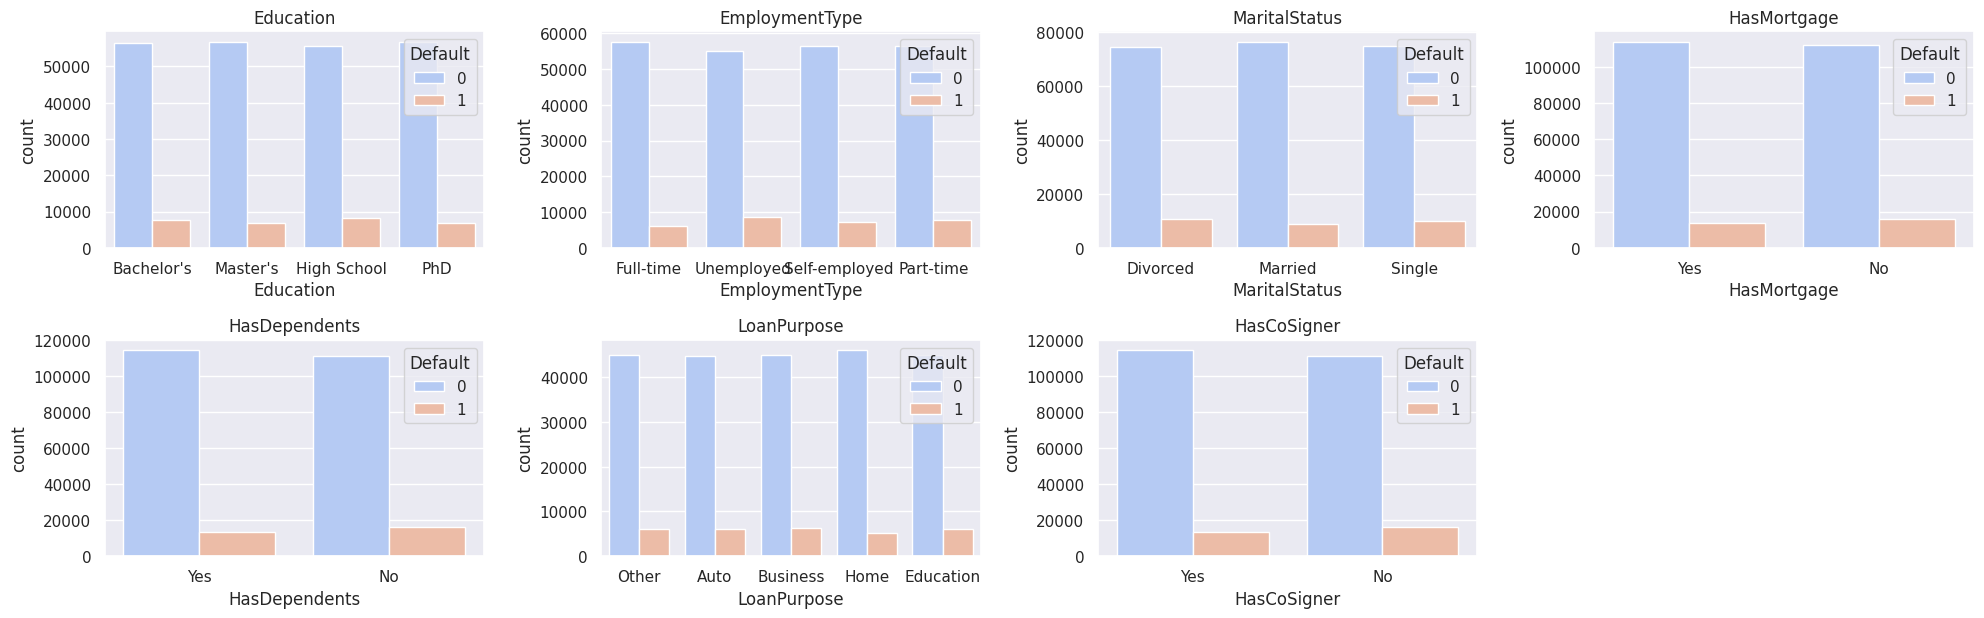

In [12]:
plt.figure(figsize=(20, 12))

categorical_cols = df.select_dtypes(include=['object'])

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(df , x = df[col] , hue = "Default" , palette="coolwarm")
    plt.title(f"{col}")
plt.tight_layout()

In [15]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [16]:
from sklearn.model_selection import train_test_split
x = df.drop('Default' , axis = 1)
y = df['Default']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x_train, y_train)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_smote)
x_test_scaled = scaler.transform(x_test)


In [34]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV , cross_val_score

In [35]:
models = {
    "Decision Tree" : DecisionTreeClassifier(),

    "XGBoost" : XGBClassifier()
}


param_grid = {
    "Decision Tree" : {
        "max_depth" : [None , 10 , 20],
        "min_samples_split" : [2 , 5 , 10]
    },


    "XGBoost" : {
        "n_estimators" : [50 , 100 , 200],
        "learning_rate" : [0.01 , 0.1 , 0.2],
        "max_depth" : [3 , 5 , 10]
    }
}

In [37]:
best_score = {}

for name , model in models.items():
  gs = GridSearchCV(model , param_grid[name] , cv = 5)
best_score = {}

for name , model in models.items():
  gs = GridSearchCV(model , param_grid[name] , cv = 5)
  gs.fit(x_train_scaled, y_smote)

  best_score.update({
      "model_name" : name,
      "best_score" : gs.best_score_,
      "best_params" : gs.best_params_
  })
df_result = pd.DataFrame(best_score)
print(df_result)

              model_name  best_score  best_params
learning_rate    XGBoost    0.916831          0.2
max_depth        XGBoost    0.916831         10.0
n_estimators     XGBoost    0.916831        200.0


In [38]:
XGB_clf = XGBClassifier(n_estimator = 200, max_depth = 10 , learning_rate = 0.2)
XGB_clf.fit(x_train_scaled, y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=200, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [39]:
XGB_Score = cross_val_score(XGB_clf , x_train_scaled , y_smote , cv = 5)
np.mean(XGB_Score)

np.float64(0.9148980836296625)

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = XGB_clf.predict(x_test_scaled)
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
print('-'*100)
print("Classification Report:\n", classification_report(y_test, y_pred))
print('-'*100)
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score:
 0.8824162913647934
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94     45170
           1       0.46      0.11      0.18      5900

    accuracy                           0.88     51070
   macro avg       0.68      0.55      0.56     51070
weighted avg       0.84      0.88      0.85     51070

----------------------------------------------------------------------------------------------------
Confsuion Matrix:
 [[44421   749]
 [ 5256   644]]
